# Set up
1) Load the necessary modules for this toturial
2) Load the GridSamp toolbox and set the path correctly
3) Load the image_region objects using various grids. See the `Grids.ipynb` file for a toturial on the grids.

In [1]:
# LOAD MODULES
from PIL import Image
import matplotlib.pyplot as plt
import os

In [3]:
# LOAD IAM

# Change directory to that of IAM to load it
os.chdir(r'C:\Users\u0154823\OneDrive - KU Leuven\Desktop\PhD\0 Preparation\0.2 IAM toolbox\IAM toolbox\source-code\image-aesthetic-map-toolbox')

# Open IAM toolbox
from grid_samp import Node, ImageRegion, Tree
from grid_samp.grids import FixedGrid, RecursiveGrid, ImageRegionBasedGrid
from grid_samp.assemble import ROI, ImageRegionIntersectionHeatmap, Mosaic, Contextualize

# Set environment to current environment
os.chdir("Tutorials")

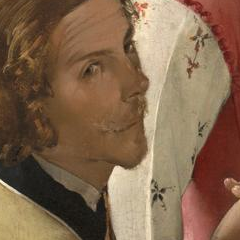

In [4]:
#------------#
# Load Image #
#------------#
image = 'example img.jpg'
image_2 = 'example_img_2.jpg'
image = Image.open(image)
image_2 = Image.open(image_2)
image_region = ImageRegion.from_image(image)


#------------#
# Fixed Grid #
#------------#

# Initialize a FixedGrid
fixed_grid = FixedGrid(image, n_rows = 15, n_cols = 20)

# Get an image region by indexing
fixed_grid_image_region = fixed_grid.get_image_region(0)

# Extract the image region from an image
fixed_grid_image_region.extract_from_image(image)


#----------------#
# Recursive Grid #
#----------------#

# Initialize a RecursiveGrid with three recursion levels
recursive_grid = RecursiveGrid(image_region, recursion_depth = 4)

# Get a list of image regions at the third recursion level
level_1_regions = recursive_grid.get_recursion_level_images(recursion_level = 1)

# Select image region from list of image regions
recursive_grid_image_region = level_1_regions.get(0)

# Extract the image region from an image
recursive_grid_image_region.extract_from_image(image)


#-------------------------#
# Image Region based Grid #
#-------------------------#

# Define anchor image region location
x, y, width, height = (750, 750, 240, 240)

# Extract anchor patch
anchor = ImageRegion(x, y, width, height)

# generate grid based on anchor and image
image_region_based_grid = ImageRegionBasedGrid(anchor, image)
image_region_based_grid_region = image_region_based_grid.get_image_region(20)
image_region_based_grid_region.extract_from_image(image)

# Get image region info
GridSamp comes with severall utility functions to access information regarding the `image_region`. This can be accessed, for example, to log image region information for further processing. You can extract:
* center (x, y) coordinates
* x_min, y_min, x_max, and y_max coordinates
* corner (x,y) coordinates

This works the same way for all `Image_Region` objects, irrespective of their grid.

In [5]:
#---------------#
# center (x, y) #
#---------------#

fixed_grid_image_region.get_center()
recursive_grid_image_region.get_center()
image_region_based_grid_region.get_center()

#----------------#
# min/max (x, y) #
#----------------#

# Get the x_min, y_min, x_max, and y_max coordinates of the patch
fixed_grid_image_region.get_bounding_box()
recursive_grid_image_region.get_bounding_box()
image_region_based_grid_region.get_bounding_box()

#---------------#
# corner (x, y) #
#---------------#

# Get the corner (x,y) coordinates of the image region
for image_region in [fixed_grid_image_region, recursive_grid_image_region, image_region_based_grid_region]:
    print(image_region.top_left(), image_region.top_right(), image_region.bottom_left(), image_region.bottom_right())


(0, 0) (86, 0) (0, 72) (86, 72)
(0, 0) (869, 0) (0, 540) (869, 540)
(270, 270) (510, 270) (270, 510) (510, 510)


# Manipulations of image region list
`Image_Region` lists can be manipulated in three ways:
* inserting a new image region in the location of an old image region. The new image region must be identical in size as the old image region.
* swapping the location of two image regions. When no image regions are specified, two random image regions are swapped.
* shuffling the location of all image regions. Optionally, image regions can be shuffled along the x-axis or y-axis, or only internal image regions can be shuffled. In addition, it is possible to select image regions that will not be shuffled.

Inserting works the same way in all `image_region` lists, irrespective of the grid. Shuffling and swapping works the same way when using a recursive and fixed grid, but not when using a image region based grid. When using a `image_region` list based on an image_region_based_grid, swapping and Shuffling are only possible if either the `columns` argument is specified or if the `internal` argument is set to `True`. 

In [8]:
level_1_regions = recursive_grid.get_recursion_level_images(1)
before_transform = Mosaic.generate(image, level_1_regions, margin=0)

#-----------#
# Replacing #
#-----------#
# Define new image region from another image
width  = level_1_regions.image_regions[0]._width
height = level_1_regions.image_regions[0]._height

new_image_region = ImageRegion(500, 500, width, height, image_2)

# Extract new patch


# Replace the old image region by the new image region and save as a new list
replaced_regions = level_1_regions.replace(0, new_image_region)
after_replace = Mosaic.generate(image, replaced_regions, margin = 0)

#----------#
# Swapping #
#----------#

# Perform swap
new_level_1_regions = level_1_regions.swap(region_1_index = 0, region_2_index = 1)

# Visualize the result in a mosaic grid
after_swap = Mosaic.generate(image, new_level_1_regions, margin=0)

#-----------#
# Shuffling #
#-----------#

# Perform shuffle
shuffled_level_1_regions = level_1_regions.shuffle()

# Get image regions after shuffling
after_shuffle = Mosaic.generate(image, shuffled_level_1_regions, margin=0)

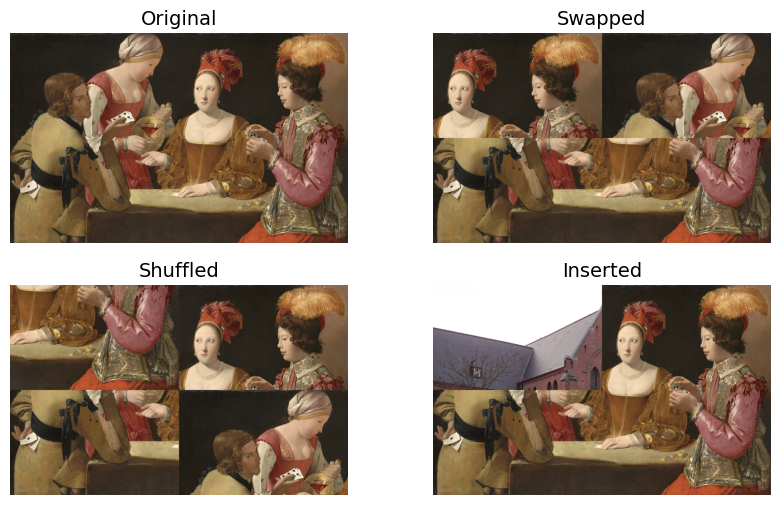

In [9]:
# Visualisations of manipulations
### Pairwise plots
plt.figure(figsize=(10, 6)) 

## Insert
plt.subplot(2, 2, 1)
plt.imshow(before_transform)
plt.title("Original", color="black", fontsize=14)
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(after_replace)
plt.title("Inserted", color="black", fontsize=14)
plt.axis('off')

# Swap
plt.subplot(2, 2, 2)
plt.imshow(after_swap)
plt.title("Swapped", color="black", fontsize=14)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(after_shuffle)
plt.title("Shuffled", color="black", fontsize=14)
plt.axis('off')

# Show image
plt.show()


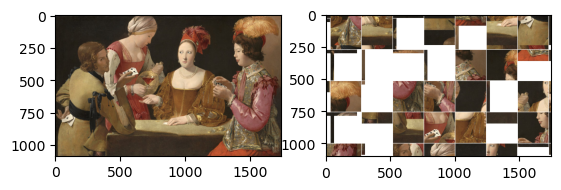

In [7]:
image_region_grid_region_list = image_region_based_grid.image_region_list

#----------#
# Swapping #
#----------#

# Perform swap - ensure that the image regions are equal in size.
swapped_regions = image_region_grid_region_list.swap(region_1_index = 3, region_2_index = 44)

after_swap = Mosaic.generate(image, image_region_grid_region_list, margin = 0)
#-----------#
# Shuffling #
#-----------#

# Perform shuffle - ensure that either the x_axis, y_axis, or interal arguments are set to True.
shuffled_regions_1 = image_region_grid_region_list.shuffle(x_axis = True)
shuffled_regions_2 = image_region_grid_region_list.shuffle(y_axis = True)
shuffled_regions_3 = image_region_grid_region_list.shuffle(internal = True)

after_shuffle = Mosaic.generate(image, shuffled_regions_1)

plt.subplot(1, 2, 1)
plt.imshow(after_swap)
plt.subplot(1, 2, 2)
plt.imshow(after_shuffle)

# Manipulations of image regions
`Image_Region` objects can be manipulated in various ways:
* Scaling: they can be increased or decreased in size. Size is always scaled centered at the original image region.
* Circular: image regions can be extracted as oval shaped image regions, rather than the default rectangular shaped image regions.
* Transparancy: the transparancy of the image regions can be changed. When set to zero, the image region is fully transparant so that it is removed from the image.
* Blurring: an image region can be blurred using a Gaussian filter.
* Inverting: an image region can be inverted along the x-axis, the y-axis, or both.
* Grey scale: an image region can be turned into a grey scaled image region.
* Saturation: the saturation of an image region can be manipulated.

### scaling
Scaling is centered around the original image and modifies its height and width. It involves assessing the current pixels and applying a scaling factor. Scaling is centered because the change in the amount of pixels is evenly distributed between the minimal and maximal coordinates of the image region. Height and width can scaled using the same or different scaling factors. The resized image remains within the boundaries of the original image region. If the scaling causes the region to extend beyond these boundaries, pixels won’t be added past the image region's edges. These excess pixels are not redistributed within the image region.

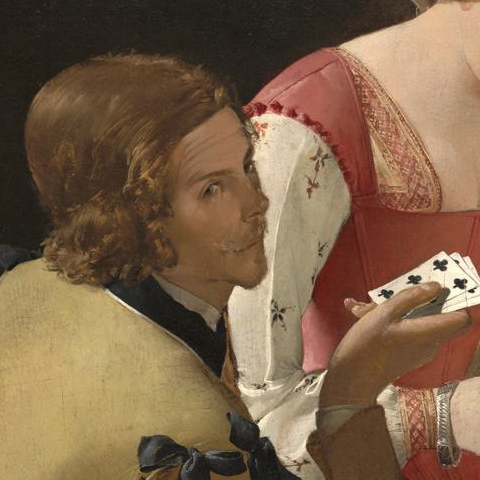

In [8]:
#---------------------------#
# Scaling the image regions #
#---------------------------#

# Scale image region
patch_1_scaled = image_region_based_grid_region.scale(2)

# Extract patch as a PIL.Image object from an image
patch_1_scaled.extract_from_image(image)

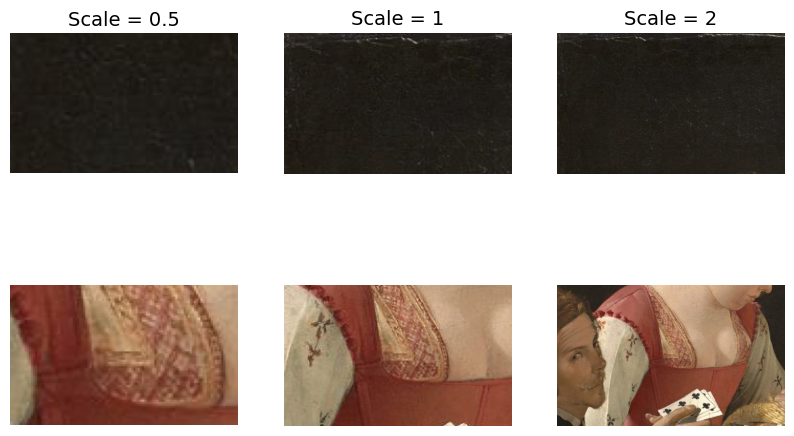

In [9]:
#----------------------------------#
# Visualising scaled image regions #
#----------------------------------#
level_3_image_regions = recursive_grid.get_recursion_level_images(3)

# Generate region of interest overlays
patch_1 = level_3_image_regions.get(0)
patch_2 = level_3_image_regions.get(12)

## Scale transformations
patch_1_scale0_5 = patch_1.scale(0.5)
patch_1_scale2 = patch_1.scale(2)
patch_2_scale0_5 = patch_2.scale(0.5)
patch_2_scale2 = patch_2.scale(2)

# Extract patches from the image at different scales
patch_1_scale0_5_img = patch_1_scale0_5.extract_from_image(image)
patch_1_img = patch_1.extract_from_image(image)  # Original scale
patch_1_scale2_img = patch_1_scale2.extract_from_image(image)

patch_2_scale0_5_img = patch_2_scale0_5.extract_from_image(image)
patch_2_img = patch_2.extract_from_image(image)  # Original scale
patch_2_scale2_img = patch_2_scale2.extract_from_image(image)

### Plot patches at three spatial scales
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Scale = 0.5
plt.subplot(2, 3, 1)
plt.imshow(patch_1_scale0_5_img)
plt.title("Scale = 0.5", color="black", fontsize=14)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(patch_2_scale0_5_img)
plt.axis('off')

# Scale = 1 (Original)
plt.subplot(2, 3, 2)
plt.imshow(patch_1_img)
plt.title("Scale = 1", color="black", fontsize=14)
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(patch_2_img)
plt.axis('off')

# Scale = 2
plt.subplot(2, 3, 3)
plt.imshow(patch_1_scale2_img)
plt.title("Scale = 2", color="black", fontsize=14)
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(patch_2_scale2_img)
plt.axis('off')

# Show image
plt.show()

### Circle

### Transparency

### Bluring

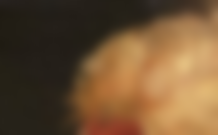

In [10]:
#------------------------------#
# Generating the image regions #
#------------------------------#

# Load example image
image = 'example img.jpg'
image = Image.open(image)

# Initialize tree
recursive_grid = RecursiveGrid(ImageRegion.from_image(image), recursion_depth = 3)

# Access the patches at the third recursion level
level_3_image_regions = recursive_grid.get_recursion_level_images(recursion_level = 3)

# Select image region from list of image regions
patch_1 = level_3_image_regions.get(20)
patch_1.blur(True)
patch_1.extract_from_image(image)


### Invert

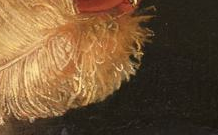

In [11]:
#------------------------------#
# Generating the image regions #
#------------------------------#

# Load example image
image = 'example img.jpg'
image = Image.open(image)

# Initialize tree
recursive_grid = RecursiveGrid(ImageRegion.from_image(image), recursion_depth = 3)

# Access the patches at the third recursion level
level_3_image_regions = recursive_grid.get_recursion_level_images(recursion_level = 3)

# Select image region from list of image regions
patch_1 = level_3_image_regions.get(20)

patch_1.invert(invert_x=True)
patch_1.invert(invert_y=True)

patch_1.extract_from_image(image)

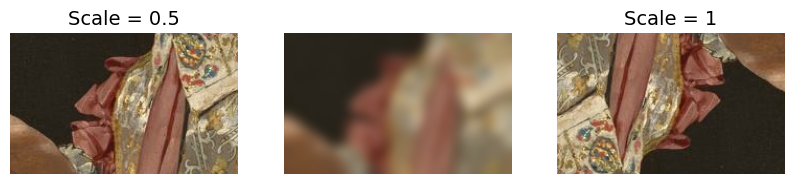

In [12]:
#----------------------#
# Visualising the grid #
#----------------------#
# Initialize tree
recursive_grid = RecursiveGrid(ImageRegion.from_image(image), recursion_depth = 3)

# Access the patches at the third recursion level
level_3_image_regions = recursive_grid.get_recursion_level_images(recursion_level = 3)

patch = level_3_image_regions.get(30)

# Generate region of interest overlays
patch_blurred = level_3_image_regions.get(30)
patch_blurred.blur()

patch_x_inverted = level_3_image_regions.get(30)
patch_x_inverted.invert(invert_x=True)

patch_y_inverted = level_3_image_regions.get(30)
patch_y_inverted.invert(invert_y=True)

### Plot patches at three spatial scales
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Scale = 0.5
plt.subplot(1, 3, 1)
plt.imshow(patch.extract_from_image(image))
plt.title("Scale = 0.5", color="black", fontsize=14)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(patch_blurred.extract_from_image(image))
plt.axis('off')

# Scale = 1 (Original)
plt.subplot(1, 3, 3)
plt.imshow(patch_x_inverted.extract_from_image(image))
plt.title("Scale = 1", color="black", fontsize=14)
plt.axis('off')

# Show image
plt.show()